# LAB 1
## 1. Linear regression

### 자료 가져오기
- https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Hitters.csv

### 자료 설명
- 1986년도부터 1987년도까지의 MLB 자료.
- 20개의 변수와 322개의 관측값으로 구성
- 변수설명
    - AtBat, Hits, HmRun, Runs, RBI, Walks : 1986년도 타수, 안타, 홈런, 득점, 타점, 볼넷 수.
    - Years : Major leagues에 있던 연수.
    - CAtBat, CHits, CHmRun, CRuns, CRBI, CWalks : 해당 선수의 총 경력기간 동안의 타격, 안타, 홈런, 득점, 타점, 볼넷 수.
    - League : A or N, 1986년도 말 American 또는 National 리그.
    - Division : E or W, 1986년도 동부 또는 서부 리그.
    - PutOuts, Assists, Errors : 1986년도 아웃 카운트, 어시스트, 실책 수
    - Salary : 1987년도 연봉
    - NewLeague : 1987년도 초 American 또는 National 리그.


### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
hitters = pd.read_csv("Hitters.csv", index_col = 0)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
print('data shape:', hitters.shape)
hitters.describe()

data shape: (322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

?sns.barplot

In [7]:
counts = hitters['League'].value_counts(normalize = True)
counts

A    0.543478
N    0.456522
Name: League, dtype: float64

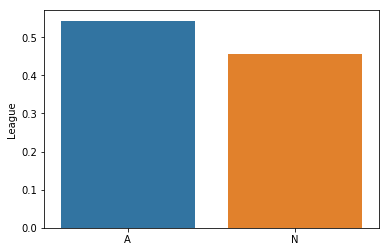

In [8]:
sns.barplot(x=counts.index, y = counts)
plt.show()

###  자료 전처리 1: 결측치 수 확인 및 제거

In [6]:
hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [10]:
hitters = hitters.dropna(axis = 0)
print(hitters.shape)

(263, 20)


### 자료 전처리 2: 범주형 변수에 대한 가변수 생성

In [11]:
hitters1 = pd.get_dummies(hitters, drop_first=True) ### drop_first 함수 확인해볼것
print(hitters1.shape)
hitters1.head(3)

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1


### 자료 전처리 3: 학습자료/예측자료 분할

In [12]:
### train data와 test data를 분리한다.

from sklearn.model_selection import train_test_split
train, test = train_test_split(hitters1, test_size = 0.3, random_state = 42) 
### random_state는 결과값이 변하지 않아야 하는 경우 설정.
### 자연수 아무값이나 넣어도 된다. -- 데이터의 unique key의 개념

X_train, y_train = train.drop("Salary", axis = 1), train.Salary
X_train = sm.add_constant(X_train)
X_test, y_test = test.drop("Salary", axis = 1), test.Salary
X_test= sm.add_constant(X_test)

### 선형 회귀 모형 적합

In [13]:
linear_model = sm.OLS(y_train, X_train)
model_fit = linear_model.fit()
print(model_fit.summary())

### r-squared : 1에 근접하면 y를 잘 설명하는것 - x변수가 많아지면 1에 근접하는 오류가 있음
### Prob(F-statistic) : p-value < 0.05 이면 Ho 기각
### 각 x 변수의 p-value로 변수의 연관성(유의미/무의미) 확인

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     13.12
Date:                Mon, 27 Aug 2018   Prob (F-statistic):           4.36e-24
Time:                        12:10:09   Log-Likelihood:                -1292.1
No. Observations:                 184   AIC:                             2624.
Df Residuals:                     164   BIC:                             2688.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -20.2618    100.178     -0.202      

In [11]:
train[['League_N', 'NewLeague_N']].corr()

,League_N,NewLeague_N
League_N,1.000000,0.847823
NewLeague_N,0.847823,1.000000


In [12]:
X_train.drop('const', axis = 1).corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.963325,0.540490,0.894022,0.771111,0.610870,0.021610,0.204011,0.214958,0.201778,0.226443,0.215242,0.123616,0.313985,0.332733,0.306431,-0.129436,-0.055713,-0.053358
Hits,0.963325,1.000000,0.526576,0.897764,0.763002,0.566680,0.026597,0.196203,0.216793,0.172467,0.217536,0.205364,0.104989,0.323203,0.291775,0.262108,-0.140176,-0.079225,-0.068664
HmRun,0.540490,0.526576,1.000000,0.650360,0.863210,0.496955,0.119899,0.216956,0.213690,0.498392,0.261703,0.360610,0.250134,0.263188,-0.185275,-0.026353,-0.216282,-0.056456,-0.169808
Runs,0.894022,0.897764,0.650360,1.000000,0.758793,0.698316,-0.031298,0.141297,0.152203,0.218330,0.198188,0.181157,0.133590,0.267451,0.137062,0.139515,-0.194094,-0.109962,-0.128631
RBI,0.771111,0.763002,0.863210,0.758793,1.000000,0.559500,0.134126,0.256066,0.261654,0.420621,0.275562,0.367664,0.218947,0.329747,0.057104,0.159669,-0.174554,-0.097047,-0.116615
Walks,0.610870,0.566680,0.496955,0.698316,0.559500,1.000000,0.083127,0.205887,0.200083,0.340979,0.263769,0.273479,0.373213,0.246826,0.063906,0.049102,-0.063324,-0.067168,-0.033362
Years,0.021610,0.026597,0.119899,-0.031298,0.134126,0.083127,1.000000,0.918993,0.903210,0.732944,0.883854,0.873337,0.836696,-0.026819,-0.047901,-0.124355,0.042446,0.008974,0.038100
CAtBat,0.204011,0.196203,0.216956,0.141297,0.256066,0.205887,0.918993,1.000000,0.995715,0.804549,0.984413,0.952665,0.903650,0.060826,0.007952,-0.041905,0.045377,0.008707,0.060109
CHits,0.214958,0.216793,0.213690,0.152203,0.261654,0.200083,0.903210,0.995715,1.000000,0.780609,0.984531,0.943277,0.887338,0.076553,0.000352,-0.040874,0.045167,0.006332,0.066404
CHmRun,0.201778,0.172467,0.498392,0.218330,0.420621,0.340979,0.732944,0.804549,0.780609,1.000000,0.825734,0.931374,0.844800,0.106306,-0.158312,-0.140903,-0.058328,-0.022956,-0.046410


### 잔차분석
- 회귀분석의 가정(선형성, 등분산성, 정규성)을 만족하는지 확인하기 위해 잔차분석을 진행.


In [13]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

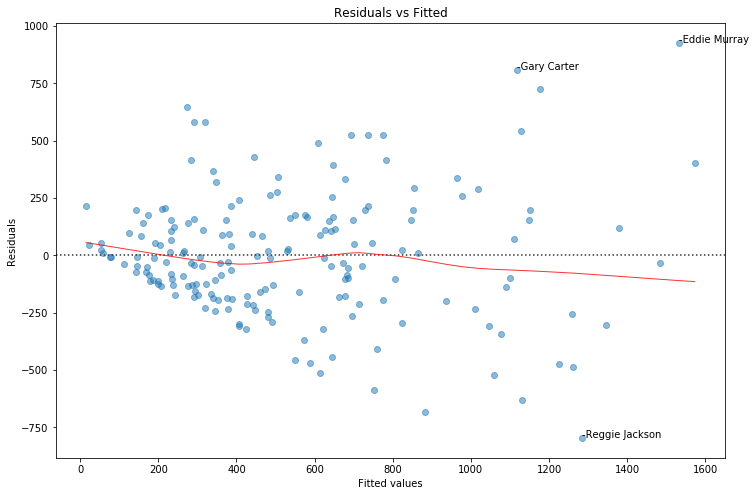

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Salary', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));
plt.show()

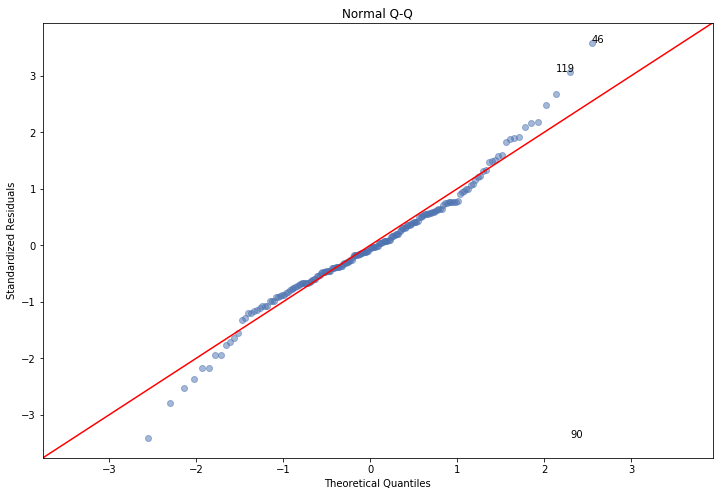

In [15]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.show()

### 이상점과 영향점
- 자료들이 추세와 동떨어져 있는 점을 이상점(outlier)라고 하고, 선형 회귀 분석에서 회귀 결과에 영향을 크게 주는 점을 영향점이라 한다.
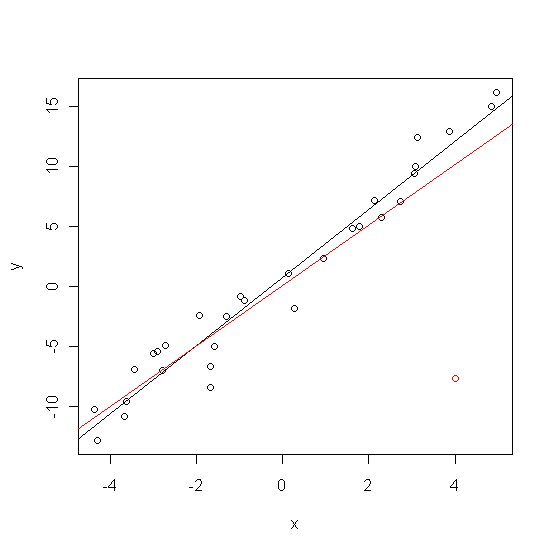
- 영향점을 찾는 기준:
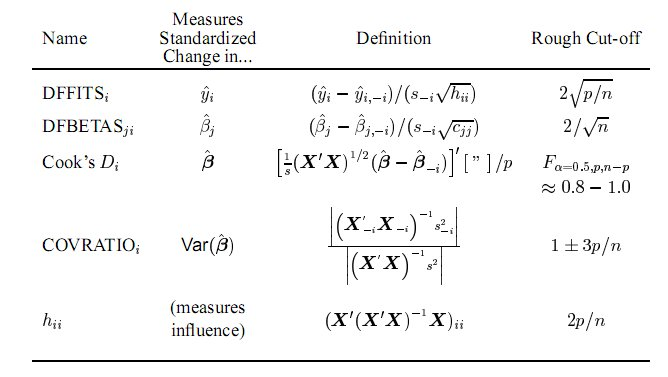

In [16]:
influences = model_fit.get_influence()
influences.summary_table()

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,1300.0,775.623695828,0.0127458431558,1.88884923721,0.066685582646,0.504892922425,1.90390494597,0.508917341447
1.0,1043.333,647.499082716,0.0145470347917,1.46755966379,0.119010111943,0.539389187725,1.47278117081,0.541308308632
2.0,1220.0,693.198991358,0.0134924274321,1.90047049018,0.06951927091,0.519469487691,1.91588179088,0.523681971138
3.0,500.0,1129.5983221,0.0451927900166,-2.36179311163,0.139442549643,-0.950713311326,-2.39567554358,-0.964352304055
4.0,75.0,53.3799931473,4.61196975903e-05,0.0804218742822,0.124815289339,0.0303709392645,0.0801778917398,0.0302788004149
5.0,920.0,274.639304859,0.0691297411221,2.48459477749,0.182984425065,1.17583792354,2.52498620701,1.19495322357
6.0,350.0,379.470438582,2.60594425574e-05,-0.104952717027,0.0451783139456,-0.0228295609057,-0.104635763961,-0.0227606165322
7.0,750.0,700.665856341,0.000166874493994,0.180278038041,0.0931280055097,0.0577710124533,0.179745380577,0.057600319665
8.0,733.333,1077.77649817,0.0131979447244,-1.29017491224,0.136871920445,-0.513769300842,-1.29281300438,-0.514819833403


### DFFITS을 이용한 영향점 확인 및 제거

In [17]:
dffits = influences.dffits
print('number of outliers:', sum(abs(dffits[0])> dffits[1]))

train_rm_outliers = train[abs(dffits[0]) <= dffits[1]]
X_rm_outliers, y_rm_outliers =  train_rm_outliers.drop("Salary", axis = 1), train_rm_outliers.Salary

number of outliers: 18


### 영향점 제거된 선형회귀모형

In [18]:
X_rm_outliers = sm.add_constant(X_rm_outliers)
linear_model2 = sm.OLS(y_rm_outliers, X_rm_outliers)
model_fit2 = linear_model2.fit()
print(model_fit2.summary())

model_fitted_y2 = model_fit2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     20.16
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.00e-31
Time:                        14:00:09   Log-Likelihood:                -1106.5
No. Observations:                 166   AIC:                             2253.
Df Residuals:                     146   BIC:                             2315.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -113.0971     77.359     -1.462      

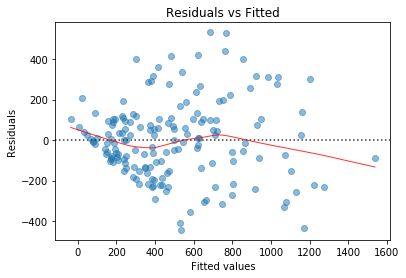

In [19]:
plot_lm_2 = plt.figure()
plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)
plot_lm_2.axes[0] = sns.residplot(model_fitted_y2, 'Salary', data=train_rm_outliers, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_2.axes[0].set_title('Residuals vs Fitted')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('Residuals')
plt.show()

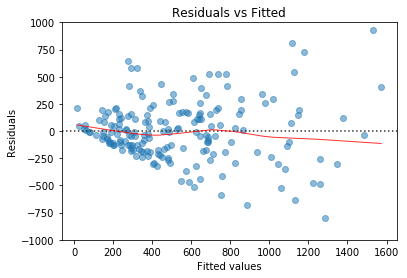

In [20]:
plot_lm_1 = plt.figure()
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(6)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Salary', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plot_lm_1.axes[0].set_ylim(-1000, 1000)
plt.show()

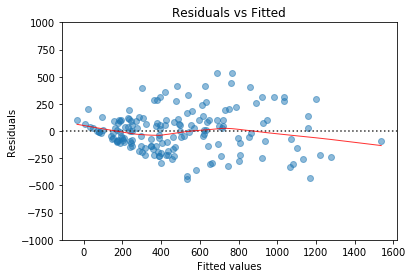

In [21]:
plot_lm_2 = plt.figure()
plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)
plot_lm_2.axes[0] = sns.residplot(model_fitted_y2, 'Salary', data=train_rm_outliers, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_2.axes[0].set_title('Residuals vs Fitted')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('Residuals')
plot_lm_2.axes[0].set_ylim(-1000, 1000)
plt.show()

### 평균 반응 및 평균 반응의 신뢰구간

In [22]:
train_prediction = model_fit.get_prediction(X_test)
print(train_prediction.summary_frame(alpha = 0.05).head())
y_test_pred = model_fit.predict(X_test)

                        mean     mean_se  mean_ci_lower  mean_ci_upper  \
-Jim Gantner      621.974044   89.718749     444.821271     799.126817   
-Jim Morrison     712.047673  110.230146     494.394438     929.700908   
-Willie Randolph  835.399727  149.076608     541.042810    1129.756645   
-Steve Jeltz      377.420922   91.849786     196.060344     558.781499   
-Darrell Porter   328.148600  159.791625      12.634510     643.662689   

                  obs_ci_lower  obs_ci_upper  
-Jim Gantner         27.552879   1216.395209  
-Jim Morrison       104.325412   1319.769934  
-Willie Randolph    196.181915   1474.617539  
-Steve Jeltz       -218.267819    973.109662  
-Darrell Porter    -321.083683    977.380882  


### 예측자료에서의 성능 평가

In [23]:
from statsmodels.tools.eval_measures import mse
y_test_pred1 = model_fit.predict(X_test)
y_test_pred2 = model_fit2.predict(X_test)
print('Test MSE with all train data,',mse(y_test, y_test_pred1))
print('Test MSE without influence data,',mse(y_test, y_test_pred2))

Test MSE with all train data, 150406.583731
Test MSE without influence data, 149689.780365


### 참고: scikit-learn 라이브러리 이용

In [24]:
from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X_train, y_train)
lm.coef_

array([ -20.26184802,   -1.34892212,    6.93122222,    9.5945118 ,
         -1.46803181,   -2.97063049,    3.99050872,   20.03888059,
         -0.38859971,    0.68333937,    0.43487537,    1.5443897 ,
          0.50883961,   -0.6266354 ,    0.29964205,    0.38858767,
         -2.1505487 ,  142.46145468,  -88.55416517,  -61.82556979])

In [25]:
y_pred = lm.predict(X_test)
print('Test MSE with scikit learn', mse(y_test, y_pred))

Test MSE with scikit learn 150406.583731


## 2. Linear regression with variable selection

- $R^2 = 1- \frac{SS_{res}}{SS_{tot}}$
where $SS_{tot} = \sum_i (y_i - \bar{y})^2 $, $ \bar{y} = \frac{1}{n} \sum_i y_i$, $SS_{res} = \sum_i (y_i - \hat{y}_i)^2 = \sum_i e_i^2$.

- $R^2_{adj} = 1-\frac{n-1}{n-p}(1-R^2)$

- $ AIC = -2 \text{log-likelihood} +2p$
- $BIC =  -2\text{log-likelihood} +p \log n$

### Adjusted $R^2$을 이용한 최적부분집합 선택

In [26]:
import itertools
def processSubset(feature_set, X, y):
    # Fit model on feature_set and calculate RSS
    X = X[list(feature_set)]
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    regr = model.fit()
    adj_r2 = regr.rsquared_adj
    return {"model":regr, "adj_r2":adj_r2}

def getBest(k, X, y):
    results = []
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo, X, y))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['adj_r2'].argmax()]
    print("Processed ", models.shape[0], "models on", k, "predictors")
    # Return the best model, along with some other useful information about the model
    return best_model

In [27]:
import time
models = pd.DataFrame(columns=["adj_r2", "model"])
tic = time.time()
for i in range(1,10):
    models.loc[i] = getBest(i, X_train, y_train)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 1 predictors


D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Processed  171 models on 2 predictors
Processed  969 models on 3 predictors
Processed  3876 models on 4 predictors
Processed  11628 models on 5 predictors
Processed  27132 models on 6 predictors
Processed  50388 models on 7 predictors
Processed  75582 models on 8 predictors
Processed  92378 models on 9 predictors
Total elapsed time: 779.2268438339233 seconds.


In [28]:
print(models.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     82.32
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           3.76e-26
Time:                        14:13:09   Log-Likelihood:                -1317.6
No. Observations:                 184   AIC:                             2641.
Df Residuals:                     181   BIC:                             2651.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -91.7204     62.819     -1.460      0.1

In [29]:
models

,adj_r2,model
1,0.327166,<statsmodels.regression.linear_model.Regressio...
2,0.470536,<statsmodels.regression.linear_model.Regressio...
3,0.506391,<statsmodels.regression.linear_model.Regressio...
4,0.517982,<statsmodels.regression.linear_model.Regressio...
5,0.531693,<statsmodels.regression.linear_model.Regressio...
6,0.543600,<statsmodels.regression.linear_model.Regressio...
7,0.550051,<statsmodels.regression.linear_model.Regressio...
8,0.554909,<statsmodels.regression.linear_model.Regressio...
9,0.557103,<statsmodels.regression.linear_model.Regressio...


### AIC을 이용한 전진선택법

In [30]:
# forward selection using AIC
def forward_selected(data, response):
    """
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by AIC
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score =10000.0, 0.0
    iteration = 0
    while remaining and iteration < len(remaining):
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        iteration = iteration +1
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [31]:
model_w_fselect = forward_selected(train, 'Salary')

In [32]:
print(model_w_fselect.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     24.59
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.94e-28
Time:                        14:13:10   Log-Likelihood:                -1295.8
No. Observations:                 184   AIC:                             2614.
Df Residuals:                     173   BIC:                             2649.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3563     77.502      0.456      0.6

In [33]:
print(model_w_fselect.model.formula)

Salary ~ CRBI + Hits + PutOuts + Division_W + AtBat + Walks + CRuns + CAtBat + CWalks + League_N + 1


In [34]:
y_test_pred3 = model_w_fselect.predict(X_test)
print('Test MSE with all train data,',mse(y_test, y_test_pred1))
print('Test MSE with variable selection,',mse(y_test, y_test_pred3))

Test MSE with all train data, 150406.583731
Test MSE with variable selection, 141288.110843


### 참고: Polynomial regression

In [35]:
poly_reg = smf.ols(formula = 'Salary ~ Hits + CAtBat + I(Walks**2)', data = train).fit()
poly_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     52.32
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           2.29e-24
Time:                        14:13:10   Log-Likelihood:                -1319.4
No. Observations:                 184   AIC:                             2647.
Df Residuals:                     180   BIC:                             2660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -99.0671     64.574     -1.534      0.127    -226.486      28.352
Hits              3.2281      0.633      5.103      0.000       1.980       4.476
CAtBat            0.0808      0.010      7.864      0.000       0.061       0.101
I(Walks ** 2)     0.0382      0.014      2.699      0.008       0.010       0.066
==============================================================================
Omnibus:                       41.951   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.754
Skew:                           1.038   Prob(JB):                     3.24e-20
Kurtosis:                       5.719   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BIC을 이용한 후진소거법 직접 해보기
## 3. 직접해보기
- 미국 보스턴시의 주택가격 자료를 사용하여 아래 분석 실행.
    - 선형회귀분석 및 잔차 분석
    - 영향점 제거한 선형회귀분석
    - 변수선택법(best subset selection, 전진선택법, 후진선택법)
    
### Boston 자료 설명
- 자료 수는 506이고, 총 14개의 변수로 이루어져있다.
- 설명 변수: 마을의 평균 범죄율 (crim), 주거지 비율 (zn), 상업용지비율 (indus), 강 인접여부 (chas), 질소산화물의 농도 (nox), 집 당 평균 방의 수 (rm), 자가거주 주택 비율 (age), 보스턴의 5개 고용 중심지와의 가중 평균 거리 (dis), 고속도로 접근 지수 (rad), 10000달러 당 재산세 비율 (tax), 마을의 교사당 학생 비율 (ptratio), 마을의 흑인 비율 (black), 하층민의 비율 (lstat)
- 반응변수: 자가거주 주택의 중앙값 (medv)

### 데이터 불러오기

In [36]:
Boston = pd.read_csv("Boston.csv")
print('Data shape:', Boston.shape)
Boston = Boston.iloc[:, 1:]
Boston.head()

Data shape: (506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
